Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Screenshot 2026-02-21 023158.png to Screenshot 2026-02-21 023158 (1).png


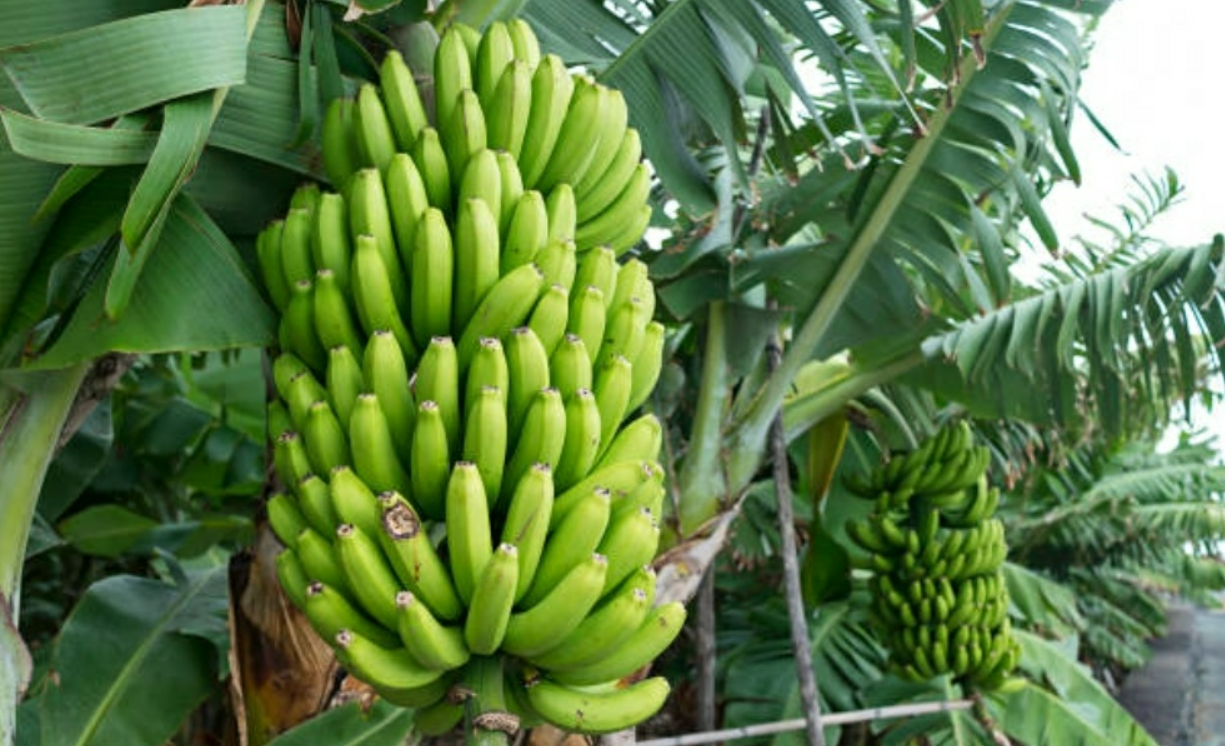

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Crop: banana
Confidence: 0.9998573064804077


In [14]:
import numpy as np
import cv2
import tensorflow as tf
import os
from sklearn.preprocessing import LabelEncoder
from google.colab import drive, files
from IPython.display import Image, display

# Mount Google Drive
drive.mount('/content/drive')

# Paths
MODEL_PATH = "/content/drive/MyDrive/Crop Identification/models/model_epoch_09.h5"
DATASET_PATH = "/content/drive/MyDrive/Crop Identification/Agricultural-crops"

# Load trained model
model = tf.keras.models.load_model(MODEL_PATH)

# Recreate label encoder (same order as training)
labels = sorted(os.listdir(DATASET_PATH))
le = LabelEncoder()
le.fit(labels)

# Prediction function
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img.astype("float32")
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    class_name = le.inverse_transform([class_index])[0]

    confidence = np.max(prediction)

    return class_name, confidence

# Upload image at runtime
uploaded = files.upload()

# Get uploaded filename
img_path = list(uploaded.keys())[0]

# Display uploaded image
display(Image(img_path))

# Predict
class_name, confidence = predict_image(img_path)

print("Predicted Crop:", class_name)
print("Confidence:", float(confidence))